<a href="https://colab.research.google.com/github/seosztt/ML_Project/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DF1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/양파.xlsx', thousands=',')

In [ ]:
DF1['도매가격(원/kg)'] = DF1['도매가격(원/kg)'].replace('-',0)
DF1['도매가격(원/kg)'] = DF1['도매가격(원/kg)'].astype(float)
DF1

,일자,품목,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),거래량(톤),거래금액(백만원)
0,2021-10-07,양파,양파(일반),대구북부도매,효성청과,경남,창녕,751.427317,22.77,17.11
1,2021-10-07,양파,양파(일반),대구북부도매,효성청과,경남,합천,714.854269,18.49,13.22
2,2021-10-07,양파,양파(일반),대구북부도매,효성청과,경북,고령,696.811539,10.54,7.34
3,2021-10-07,양파,양파(일반),대구북부도매,효성청과,경북,영천,792.929293,7.92,6.28
4,2021-10-07,양파,양파(일반),대구북부도매,대구중앙청과,대구,달성,584.558824,2.72,1.59
...,...,...,...,...,...,...,...,...,...,...
247167,2014-01-03,양파,저장양파,서울가락도매,한국청과,경북,경산,786.583333,12.00,9.44
247168,2014-01-03,양파,저장양파,서울가락도매,동화청과,경남,창녕,665.000000,11.80,7.85
247169,2014-01-03,양파,자주양파,서울가락도매,한국청과,전남,무안,1209.448819,1.52,1.84
247170,2014-01-03,양파,자주양파,서울가락도매,중앙청과,전남,무안,1225.000000,0.77,0.94


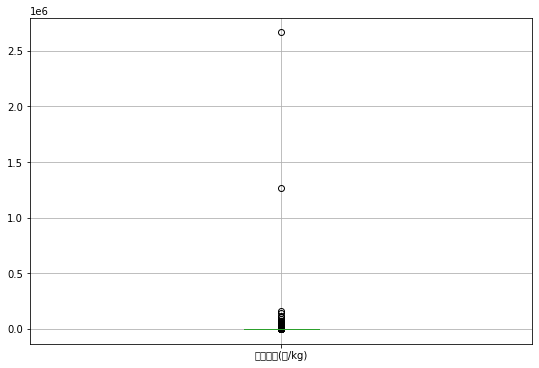

In [ ]:
plt.figure(figsize = (9,6))
boxplot = DF1.boxplot(column = ['도매가격(원/kg)'])
plt.show()

In [ ]:
#이상치 처리
quartile_1 = DF1['도매가격(원/kg)'].quantile(0.25)
quartile_3 = DF1['도매가격(원/kg)'].quantile(0.75)
IQR = quartile_3 - quartile_1
search_df = DF1[(DF1['도매가격(원/kg)'] < (quartile_1 - 5 * IQR)) | (DF1['도매가격(원/kg)'] > (quartile_3 + 5 * IQR))]
print(search_df)

               일자  품목      품종      시장  ...  시군산지    도매가격(원/kg) 거래량(톤)  거래금액(백만원)
787    2021-10-01  양파  양파(일반)    진주도매  ...    진주  1.600000e+04  0.001       0.02
1467   2021-09-18  양파      기타    천안도매  ...  서울중구  3.750000e+03  0.020       0.08
3376   2021-09-03  양파      기타    포항도매  ...    영천  1.000000e+04  0.090       0.90
4581   2021-08-24  양파    자주양파    포항도매  ...    영천  1.375000e+04  0.008       0.11
5306   2021-08-18  양파    저장양파  서울강서도매  ...    함양  2.664769e+06  0.005      13.32
...           ...  ..     ...     ...  ...   ...           ...    ...        ...
210997 2017-02-01  양파      기타    구리도매  ...    구리  3.389300e+03  0.050       0.17
222416 2016-04-02  양파     깐양파    안산도매  ...    서산  3.400000e+03  0.010       0.03
245249 2014-04-09  양파    자주양파  서울가락도매  ...    무안  4.041667e+03  0.070       0.29
245449 2014-04-03  양파    자주양파  서울가락도매  ...    무안  3.631579e+03  0.680       2.48
245487 2014-04-02  양파    자주양파  서울가락도매  ...    함양  3.892535e+03  0.580       2.24

[519 rows x 10 columns]


In [ ]:
DF1 = DF1.drop(search_df.index, axis = 0)
print(DF1)

               일자  품목      품종      시장  ... 시군산지   도매가격(원/kg) 거래량(톤)  거래금액(백만원)
0      2021-10-07  양파  양파(일반)  대구북부도매  ...   창녕   751.427317  22.77      17.11
1      2021-10-07  양파  양파(일반)  대구북부도매  ...   합천   714.854269  18.49      13.22
2      2021-10-07  양파  양파(일반)  대구북부도매  ...   고령   696.811539  10.54       7.34
3      2021-10-07  양파  양파(일반)  대구북부도매  ...   영천   792.929293   7.92       6.28
4      2021-10-07  양파  양파(일반)  대구북부도매  ...   달성   584.558824   2.72       1.59
...           ...  ..     ...     ...  ...  ...          ...    ...        ...
247167 2014-01-03  양파    저장양파  서울가락도매  ...   경산   786.583333  12.00       9.44
247168 2014-01-03  양파    저장양파  서울가락도매  ...   창녕   665.000000  11.80       7.85
247169 2014-01-03  양파    자주양파  서울가락도매  ...   무안  1209.448819   1.52       1.84
247170 2014-01-03  양파    자주양파  서울가락도매  ...   무안  1225.000000   0.77       0.94
247171 2014-01-03  양파    자주양파  서울가락도매  ...   문경  1480.000000   0.50       0.74

[246653 rows x 10 columns]


In [ ]:
# row마다 거래량이 다르기 때문에 단순히 일자별로 groupby해서 도매가격 평균 내면 실제 하루 평균 도매가격과 다르다.
# DF2 = DF1.groupby('일자').mean()
# 하루 거래금액 합계를 하루 거래량 합계로 나누면 하루 평균 도매가격이다.
DF2 = DF1.groupby('일자').sum()
DF2['도매가격']=(DF2['거래금액(백만원)']*1000)/DF2['거래량(톤)']
DF2.drop(columns=['도매가격(원/kg)'], inplace=True)

In [ ]:
DF2.head()

,거래량(톤),거래금액(백만원),도매가격
일자,,,
2014-01-03,991.01,725.48,732.061230
2014-01-04,533.11,399.97,750.257921
2014-01-06,981.93,699.03,711.893923
2014-01-07,662.89,481.38,726.183831
2014-01-08,649.53,451.31,694.825489


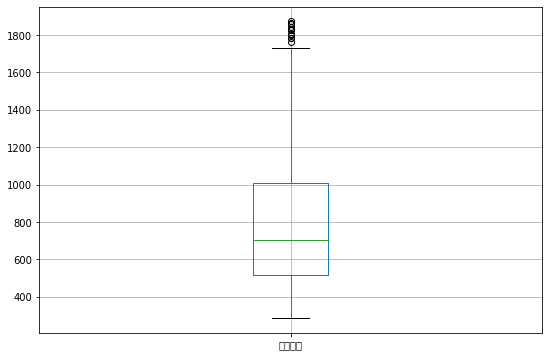

In [ ]:
#이상치 탐지 
plt.figure(figsize = (9,6))
boxplot = DF2.boxplot(column = ['도매가격'])
plt.show()

In [ ]:
DF3 = DF2['도매가격']
DF3

일자
2014-01-03    732.061230
2014-01-04    750.257921
2014-01-06    711.893923
2014-01-07    726.183831
2014-01-08    694.825489
                 ...    
2021-10-02    807.133038
2021-10-04    833.134110
2021-10-05    851.458806
2021-10-06    887.809457
2021-10-07    874.892206
Name: 도매가격, Length: 2398, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(DF3, test_size = 0.4, shuffle = False)

In [ ]:
train_data

일자
2014-01-03    732.061230
2014-01-04    750.257921
2014-01-06    711.893923
2014-01-07    726.183831
2014-01-08    694.825489
                 ...    
2018-08-23    601.272179
2018-08-24    595.689911
2018-08-25    654.400350
2018-08-27    645.582722
2018-08-28    630.879904
Name: 도매가격, Length: 1438, dtype: float64

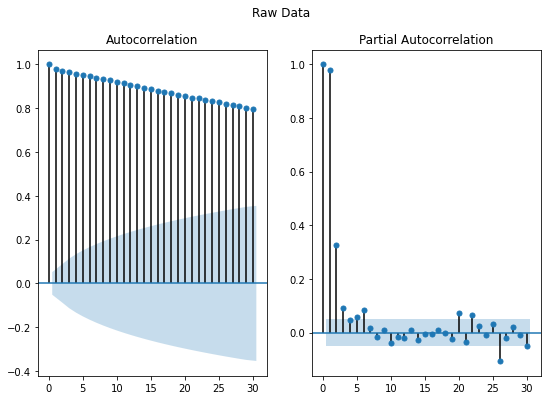

In [ ]:
import statsmodels.api as sm
fig, ax = plt.subplots(1,2, figsize = (9,6))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags = 30, ax = ax[1]);

In [ ]:
#비정상적인 데이터를 차분으로 정상적인 데이터를 만들어야 한다.
# 차분은 현시점의 데이터에서 전 시점의 데이터를 뺀값이다.
diff_train_data = train_data.copy()
diff_train_data = diff_train_data.diff()
#차분을 하게되면 맨앞과 맨뒤에 결치가 생겨 결측치를 제거하는 과정이 필요하다.
diff_train_data = diff_train_data.dropna()
print(train_data)
print('*****************************')
print(diff_train_data)

일자
2014-01-03    732.061230
2014-01-04    750.257921
2014-01-06    711.893923
2014-01-07    726.183831
2014-01-08    694.825489
                 ...    
2018-08-23    601.272179
2018-08-24    595.689911
2018-08-25    654.400350
2018-08-27    645.582722
2018-08-28    630.879904
Name: 도매가격, Length: 1438, dtype: float64
*****************************
일자
2014-01-04    18.196690
2014-01-06   -38.363997
2014-01-07    14.289908
2014-01-08   -31.358342
2014-01-09   -29.585100
                ...    
2018-08-23     3.697020
2018-08-24    -5.582269
2018-08-25    58.710439
2018-08-27    -8.817628
2018-08-28   -14.702818
Name: 도매가격, Length: 1437, dtype: float64


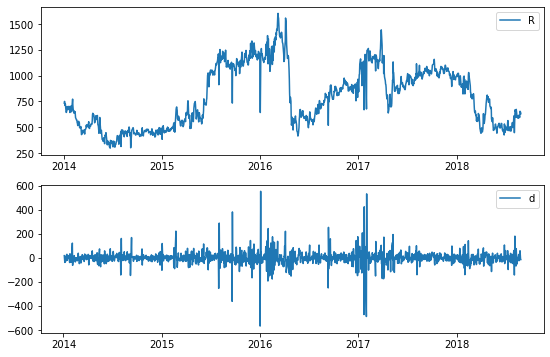

In [ ]:
plt.figure(figsize = (9,6))
plt.subplot(211)
plt.plot(train_data)
plt.legend('Raw Data')
plt.subplot(212)
plt.plot(diff_train_data)
plt.legend('diff Data')
plt.show()

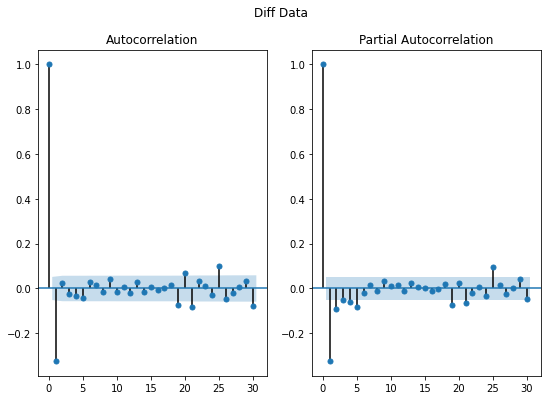

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (9,6))
fig.suptitle('Diff Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags = 30, ax = ax[1]);

In [ ]:
model = ARIMA(diff_train_data.values, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1436
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -8216.425
Method:                       css-mle   S.D. of innovations             73.894
Date:                Tue, 12 Oct 2021   AIC                          16438.849
Time:                        07:11:46   BIC                          16454.658
Sample:                             1   HQIC                         16444.751
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0059      1.196     -0.005      0.996      -2.350       2.338
ar.L1.D.y     -0.6307      0.020    -30.829      0.000      -0.671      -0.591
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5856           +0.0000j            1.5856            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
# 여러범위로 ARIMA 최적의 파라미터 선정해보기
import itertools
p = range(0,3)
d = range(0,2)
q = range(0,2)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq:
    model = ARIMA(train_data.values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA : {i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(round(model_fit.aic,2))

ARIMA : (0, 0, 0) >> AIC : 20388.02
ARIMA : (0, 0, 1) >> AIC : 18880.11
ARIMA : (0, 1, 0) >> AIC : 15777.7
ARIMA : (0, 1, 1) >> AIC : 15602.58
ARIMA : (1, 0, 0) >> AIC : 15778.3
ARIMA : (1, 0, 1) >> AIC : 15612.56
ARIMA : (1, 1, 0) >> AIC : 15620.83
ARIMA : (1, 1, 1) >> AIC : 15604.17
ARIMA : (2, 0, 0) >> AIC : 15628.56
ARIMA : (2, 0, 1) >> AIC : 15614.39
ARIMA : (2, 1, 0) >> AIC : 15610.9
ARIMA : (2, 1, 1) >> AIC : 15600.16


In [ ]:
model_opt = ARIMA(train_data.values, order=(2,1,1))
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1437
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -7795.082
Method:                       css-mle   S.D. of innovations             54.902
Date:                Tue, 12 Oct 2021   AIC                          15600.163
Time:                        07:12:10   BIC                          15626.515
Sample:                             1   HQIC                         15610.001
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0678      0.817     -0.083      0.934      -1.669       1.533
ar.L1.D.y      0.3188      0.092      3.480      0.001       0.139       0.498
ar.L2.D.y      0.1220      0.046      2.663      0.008       0.032       0.212
ma.L1.D.y     -0.6848      0.086     -7.970      0.000      -0.853      -0.516
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8408           +0.0000j            1.8408            0.0000
AR.2           -4.4546           +0.0000j            4.4546            0.5000
MA.1            1.4602           +0.0000j            1.4602            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
from sklearn.metrics import r2_score
prediction = model_opt_fit.forecast(len(test_data))
prediction_value = prediction[0]
predicted_ub = prediction[2][:,0]
predicted_lb = prediction[2][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, prediction_value)

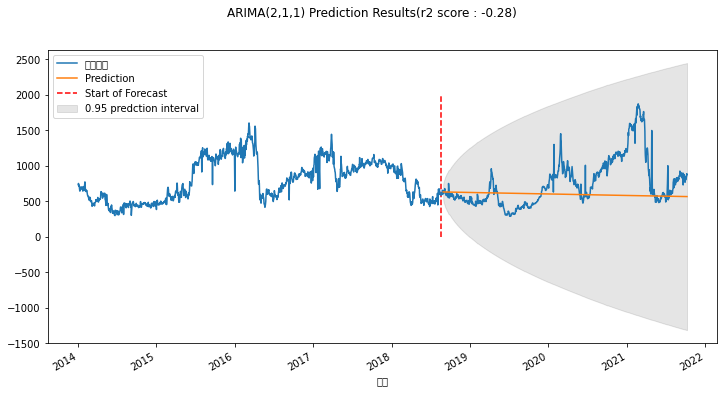

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
DF3.plot(ax = ax)
ax.vlines('2018-08-17', 0,2000,linestyle = '--', color = 'r', label = 'Start of Forecast');
ax.plot(predict_index, prediction_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 predction interval')
ax.legend(loc = 'upper left')
plt.suptitle(f'ARIMA(2,1,1) Prediction Results(r2 score : {round(r2,2)})')
plt.show()

In [ ]:
# ADF 검정 시계열 데이터의 정상성을 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(diff_train_data)
print('ADF Statistic : %f' %result[0])
print('p-value : %f' %result[1])


ADF Statistic : -22.906194
p-value : 0.000000


In [ ]:
from sklearn import metrics


def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1],3)
    mape = round(metrics.mean_absolute_error(y_true, y_pred)*100,3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared = False),3)

    df = pd.DataFrame({
        'R2': r2,
        "Corr": corr,
        'RMSE': rmse,
        'MAPE': mape
    }, index = [0])

    return df

In [ ]:
scoring(np.array(test_data), np.array(prediction_value))

,R2,Corr,RMSE,MAPE
0,-183.874,-0.463,612.485,48925.055
